In [3]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [4]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [5]:
qid  = 'yellow'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
body = '''
    CONSTRUCT { 
           ?y a <http://www.streamreasoning.org/ontologies/2018/9/colors#Yellow>; 
               <http://www.streamreasoning.org/ontologies/2018/9/colors#from> ?r ; 
               <http://www.streamreasoning.org/ontologies/2018/9/colors#from> ?g .
    }
    FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
    FROM NAMED WINDOW <gw> ON <http://greenstream:2255/green> [RANGE PT15S STEP PT5S]
    WHERE {
        WINDOW <rw> { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red> .}

        WINDOW <gw> { ?g a <http://www.streamreasoning.org/ontologies/2018/9/colors#Green> .}

    BIND( UUID() as ?y )
    '''

In [6]:
yellowq = jasper.create(qid, body, tbox)

In [7]:
jasper.streams()

[http://jasper:8181/jasper/streams/yellow,
 http://redstream:1255/red,
 http://greenstream:2255/green,
 http://jasper:8181/jasper/streams/redgreen,
 http://jasper:8181/jasper/streams/redcount]

In [8]:
yellow_stream = yellowq.stream()

In [9]:
#the stream has not endpoint

In [10]:
yellow_stream.endpoints()

[]

In [11]:
# we need to expose it

In [12]:
r = jasper.expose(qid, 'WEBSOCKET')

In [13]:
yellowq.stream().endpoints()

[GET ws://jasper:8184/jasper/streams/yellow/observers/9875495]

In [15]:
endpoint = r.endpoints()[0]

In [16]:
resp = endpoint.call()

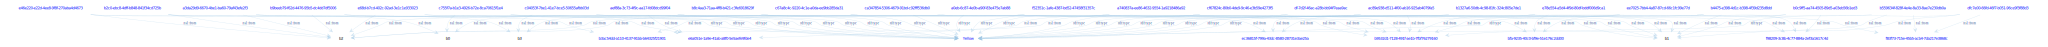

In [17]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png

data, metadata = draw_graph(resp.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [18]:
resp